In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df_churn80 = pd.read_csv('/content/drive/MyDrive/Codveda DA/churn-bigml-80.csv')
df_churn80.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df_churn20 = pd.read_csv('/content/drive/MyDrive/Codveda DA/churn-bigml-20.csv')
df_churn20.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# One-hot encoding for 'State'
df_train = pd.get_dummies(df_churn80, columns=['State'], drop_first=True)
df_test = pd.get_dummies(df_churn20, columns=['State'], drop_first=True)

# Ensure both train and test data have the same columns after one-hot encoding
# We align the columns after one-hot encoding
df_train, df_test = df_train.align(df_test, join='left', axis=1, fill_value=0)

# Label encoding for categorical boolean variables
label_encoding = ['International plan', 'Voice mail plan']
le = LabelEncoder()
for col in label_encoding:
    # Ensure there are no missing values
    df_train[col] = df_train[col].fillna('missing')  # Handling NaN by replacing it
    df_test[col] = df_test[col].fillna('missing')  # Handling NaN by replacing it

    # Apply label encoding
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.transform(df_test[col])  # Use the same encoder for consistency

# Differentiate between features and target
X_train = df_train.drop(columns=['Churn'])
y_train = df_train['Churn']
X_test = df_test.drop(columns=['Churn'])
y_test = df_test['Churn']

# Feature scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training Logistic Regression Model
model = LogisticRegression(max_iter=500, solver='liblinear')  # Add solver for stability
model.fit(X_train_scaled, y_train)

# Predict test set
y_pred = model.predict(X_test_scaled)

# Evaluation model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8590704647676162
Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.96      0.92       572
        True       0.51      0.25      0.34        95

    accuracy                           0.86       667
   macro avg       0.70      0.61      0.63       667
weighted avg       0.83      0.86      0.84       667

Confusion Matrix:
 [[549  23]
 [ 71  24]]


In [9]:
df_sentimen = pd.read_csv('/content/drive/MyDrive/Codveda DA/3) Sentiment dataset.csv')
df_sentimen.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [11]:
df_sentimen['Timestamp'] = pd.to_datetime(df_sentimen['Timestamp'])

In [12]:
df_sentimen.drop_duplicates(inplace=True)

In [14]:
from textblob import TextBlob

def sentimenblob(text):
    analysis = TextBlob(text) # Indented this line
    polarity = analysis.sentiment.polarity

    words = text.split()
    negasi_words = {"not", "no", "never"}
    adjusted_polarity = polarity

    for i, word in enumerate(words):
        if word in negasi_words and i + 1 < len(words):
            next_word = words[i + 1]
            next_analysis = TextBlob(next_word)
            next_polarity = next_analysis.sentiment.polarity

            if next_polarity != 0:
                adjusted_polarity -= next_polarity * 2

    if sum(1 for word in words if word in negasi_words) > 1:
        adjusted_polarity = 0

    if -0.1 <= adjusted_polarity <= 0.1:
        final_sentiment = "neutral"
    elif adjusted_polarity > 0:
        final_sentiment = "positive"
    else:
        final_sentiment = "negative"

    print(f"Text: {text} | Polarity: {polarity} -> Adjusted: {adjusted_polarity} | Final: {final_sentiment}")

    return final_sentiment


df_sentimen["sentiment_blob"] = df_sentimen["Text"].apply(sentimenblob)

Text:  Enjoying a beautiful day at the park!               | Polarity: 0.75 -> Adjusted: 0.75 | Final: positive
Text:  Traffic was terrible this morning.                  | Polarity: -1.0 -> Adjusted: -1.0 | Final: negative
Text:  Just finished an amazing workout! 💪                | Polarity: 0.7500000000000001 -> Adjusted: 0.7500000000000001 | Final: positive
Text:  Excited about the upcoming weekend getaway!         | Polarity: 0.46875 -> Adjusted: 0.46875 | Final: positive
Text:  Trying out a new recipe for dinner tonight.         | Polarity: 0.13636363636363635 -> Adjusted: 0.13636363636363635 | Final: positive
Text:  Feeling grateful for the little things in life.     | Polarity: -0.1875 -> Adjusted: -0.1875 | Final: negative
Text:  Rainy days call for cozy blankets and hot cocoa.    | Polarity: 0.02500000000000001 -> Adjusted: 0.02500000000000001 | Final: neutral
Text:  The new movie release is a must-watch!              | Polarity: 0.17045454545454544 -> Adjusted: 0.170454545454

<ipython-input-15-dba24c004498>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


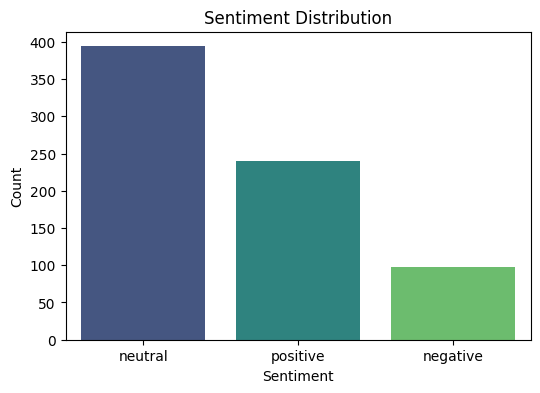

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


sentiment_counts = df_sentimen["sentiment_blob"].value_counts()

# Plot graphic
plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")
plt.show()

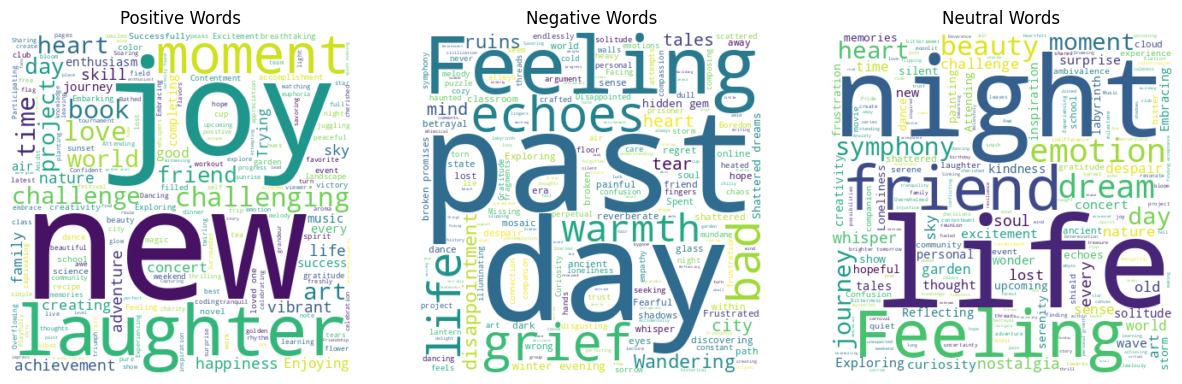

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def generate_wordcloud(text, title, ax):
    if text.strip():
        wordcloud = WordCloud(width=400, height=400, background_color="white").generate(text)
        ax.imshow(wordcloud, interpolation="bilinear")
        ax.set_title(f"{title} Words")
        ax.axis("off")
    else:
        ax.set_title(f"No {title} Words Available")
        ax.axis("off")

positive_words = " ".join(df_sentimen[df_sentimen["sentiment_blob"] == "positive"]["Text"])
negative_words = " ".join(df_sentimen[df_sentimen["sentiment_blob"] == "negative"]["Text"])
neutral_words = " ".join(df_sentimen[df_sentimen["sentiment_blob"] == "neutral"]["Text"])


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

generate_wordcloud(positive_words, "Positive", axes[0])
generate_wordcloud(negative_words, "Negative", axes[1])
generate_wordcloud(neutral_words, "Neutral", axes[2])

plt.show()

In [17]:

# Convert the classification report to DataFrame
classification_report_df = pd.DataFrame.from_dict(classification_report(y_test, y_pred, output_dict=True)).T

# Convert confusion matrix to DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred),
                                   columns=["Predicted Negative", "Predicted Positive"],
                                   index=["Actual Negative", "Actual Positive"])

# Save the results to CSV
classification_report_df.to_csv("/content/drive/MyDrive/Codveda DA/classification_report.csv", index=True)
confusion_matrix_df.to_csv("/content/drive/MyDrive/Codveda DA/confusion_matrix.csv", index=True)

# Optionally, you can also save accuracy to a CSV
accuracy_df = pd.DataFrame({'Accuracy': [accuracy]})
accuracy_df.to_csv("/content/drive/MyDrive/Codveda DA/accuracy.csv", index=False)

print("Results saved as CSV files.")

Results saved as CSV files.


In [18]:
df_sentimen.to_csv("/content/drive/MyDrive/Codveda DA/sentimen analysis.csv", index=True)
# Get the sentiment counts
sentiment_counts = df_sentimen["sentiment_blob"].value_counts()

# Save sentiment counts to CSV
sentiment_counts_df = sentiment_counts.reset_index()
sentiment_counts_df.columns = ['Sentiment', 'Count']  # Renaming columns for clarity
sentiment_counts_df.to_csv("sentiment_distribution.csv", index=False)